<a href="https://colab.research.google.com/github/duybluemind1988/Data-science/blob/master/Sonion/Compare_all_bigdata_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.datarevenue.com/en-blog/pandas-vs-dask-vs-vaex-vs-modin-vs-rapids-vs-ray

# Modin

In [ ]:
!pip install modin[all] # Install all of the above

In [ ]:
import datetime
from dateutil.parser import parse

In [ ]:
import os
import modin.pandas as pd
path='/content/drive/My Drive/Data/Sonion/V04R-V04R-SQLData.dat' # 1.88 gb

## Dask

In [ ]:
%%time
os.environ["MODIN_ENGINE"] = "dask"  # Modin will use Dask
df_dask = pd.read_csv(path,sep='\t',header=None)

CPU times: user 2.77 s, sys: 2.04 s, total: 4.82 s
Wall time: 1min 22s


In [ ]:
#import pandas as pd
#df = pd.read_csv(f, parse_dates={'Date': [0,1,2]}, index_col='Date')
#df = pd.read_csv("f500_new.csv" , encoding = "iso-8859-1" , 
#parse_dates = {'date_col' : ["day", "month", "year"]} )
#df['date_col'] = pd.to_datetime(df['date_col'])

#import pandas as pd
#mydateparser = lambda x: pd.datetime.strptime(x, "%Y %d %m %H:%M:%S")
#df = pd.read_csv("f500_new.csv" , encoding = "iso-8859-1", parse_dates = ['date_col'] , 
#date_parser = mydateparser)

In [ ]:
%%time
df_dask.head()

CPU times: user 2.94 ms, sys: 177 µs, total: 3.12 ms
Wall time: 9.12 ms


,0,1,2,3,4,5,6,7,8,9,10,125,126,127,128,129,130,131,132,133,134,135
0,DEAFAULT,1,33AE015,11,0.0477,12/22/2017 8:44:4,1,0,300,2.34,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,NaN
1,DEAFAULT,1,33ae015,11,0.0477,12/22/2017 8:44:53,1,0,300,2.35,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,NaN
2,DEAFAULT,1,33ae015,11,0.0477,12/22/2017 8:45:15,1,0,300,2.33,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,NaN
3,DEAFAULT,1,33ae015,11,0.0477,12/22/2017 8:45:54,1,0,300,2.32,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,NaN
4,DEAFAULT,1,33ae015,11,0.0477,12/22/2017 8:46:28,1,0,300,2.36,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,NaN


Cả dask và ray đều dùng ram để đọc, sau đó giải phóng ram về ban đầu (mất khoảng gần 2gb ram)

In [ ]:
%%time
df_dask[2].value_counts()

CPU times: user 75.2 ms, sys: 21.1 ms, total: 96.3 ms
Wall time: 1.56 s


SU3037_0112       2331513
SU3032_0112        521965
SU3036_0110        208614
CP_SU3032_0112      13088
su3037_0112          7095
su3032_0112          1726
su3036_0110           533
SU3037_0112t          342
SU2010_0112           305
5820                   75
cp_su3032_0112         50
tSU3037_0112           45
33ae015                10
su3037_0112t            3
5070                    3
EST65DB01               2
t-su_ritep01            1
CP_SU3037_0112          1
33AE015                 1
dtype: int64

In [ ]:
%%time
df_product_dask=df_dask[df_dask[2]=='CP_SU3032_0112']

CPU times: user 77.2 ms, sys: 30 ms, total: 107 ms
Wall time: 1.47 s


In [ ]:
df_product_dask.head()

,0,1,2,3,4,5,6,7,8,9,10,125,126,127,128,129,130,131,132,133,134,135
19604,DEFAULT,CP_SU3032_0112_58536396_SMALL_M1_WK3,CP_SU3032_0112,7117,0.01349,1/16/2018 7:41:45,1,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,NaN
19605,DEFAULT,CP_SU3032_0112_58536396_SMALL_M1_WK3,CP_SU3032_0112,7117,0.01349,1/16/2018 7:41:55,1,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,NaN
19606,DEFAULT,CP_SU3032_0112_58536396_SMALL_M1_WK3,CP_SU3032_0112,7117,0.01349,1/16/2018 7:42:4,1,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,NaN
19607,DEFAULT,CP_SU3032_0112_58536396_SMALL_M1_WK3,CP_SU3032_0112,7117,0.01349,1/16/2018 7:42:13,1,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,NaN
19608,DEFAULT,CP_SU3032_0112_58536396_SMALL_M1_WK3,CP_SU3032_0112,7117,0.01349,1/16/2018 7:43:21,1,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,NaN


In [ ]:
%%time
len(df_product_dask)

CPU times: user 17 µs, sys: 8 µs, total: 25 µs
Wall time: 26.7 µs


13088

In [ ]:
%%time
df_product_dask[5]=df_product_dask[5].astype('M8[us]')
df_product_dask[5]

CPU times: user 272 ms, sys: 47.7 ms, total: 319 ms
Wall time: 1.35 s


In [ ]:
df_product_dask[5]=df_product_dask[5].dt.date
df_product_dask[5]

19604      2018-01-16
19605      2018-01-16
19606      2018-01-16
19607      2018-01-16
19608      2018-01-16
              ...    
3057035    2019-09-16
3057036    2019-09-16
3057037    2019-09-16
3057038    2019-09-16
3057039    2019-09-16
Name: 5, Length: 13088, dtype: object

In [ ]:
df_product_dask

,0,1,2,3,4,5,6,7,8,9,10,125,126,127,128,129,130,131,132,133,134,135
19604,DEFAULT,CP_SU3032_0112_58536396_SMALL_M1_WK3,CP_SU3032_0112,7117.0,0.01349,2018-01-16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
19605,DEFAULT,CP_SU3032_0112_58536396_SMALL_M1_WK3,CP_SU3032_0112,7117.0,0.01349,2018-01-16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
19606,DEFAULT,CP_SU3032_0112_58536396_SMALL_M1_WK3,CP_SU3032_0112,7117.0,0.01349,2018-01-16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
19607,DEFAULT,CP_SU3032_0112_58536396_SMALL_M1_WK3,CP_SU3032_0112,7117.0,0.01349,2018-01-16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
19608,DEFAULT,CP_SU3032_0112_58536396_SMALL_M1_WK3,CP_SU3032_0112,7117.0,0.01349,2018-01-16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3057035,C67LSG2,CP_SU30320_0112_60719177 small m2 wk38,CP_SU3032_0112,5820.0,0.01366,2019-09-16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3057036,C67LSG2,CP_SU30320_0112_60719177 small m2 wk38,CP_SU3032_0112,5820.0,0.01366,2019-09-16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3057037,C67LSG2,CP_SU30320_0112_60719177 small m2 wk38,CP_SU3032_0112,5820.0,0.01366,2019-09-16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3057038,C67LSG2,CP_SU30320_0112_60719177 small m2 wk38,CP_SU3032_0112,5820.0,0.01366,2019-09-16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
df_product_dask.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            126, 127, 128, 129, 130, 131, 132, 133, 134, 135],
           dtype='int64', length=136)

In [ ]:
df_product_dask.columns = ['c' + str(col)  for col in df_product_dask.columns]

In [ ]:
df_product_dask.head()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c125,c126,c127,c128,c129,c130,c131,c132,c133,c134,c135
19604,DEFAULT,CP_SU3032_0112_58536396_SMALL_M1_WK3,CP_SU3032_0112,7117.0,0.01349,2018-01-16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
19605,DEFAULT,CP_SU3032_0112_58536396_SMALL_M1_WK3,CP_SU3032_0112,7117.0,0.01349,2018-01-16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
19606,DEFAULT,CP_SU3032_0112_58536396_SMALL_M1_WK3,CP_SU3032_0112,7117.0,0.01349,2018-01-16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
19607,DEFAULT,CP_SU3032_0112_58536396_SMALL_M1_WK3,CP_SU3032_0112,7117.0,0.01349,2018-01-16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
19608,DEFAULT,CP_SU3032_0112_58536396_SMALL_M1_WK3,CP_SU3032_0112,7117.0,0.01349,2018-01-16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
%%time
df_group_date=df_product_dask.groupby('c5')['c59'].mean()
df_group_date

CPU times: user 83.9 ms, sys: 6.91 ms, total: 90.8 ms
Wall time: 189 ms


In [ ]:
df_group_date

c5
2018-01-16    108.563685
2018-01-22    108.373110
2018-01-30    108.158194
2018-02-01    108.517000
2018-02-05    108.426425
                 ...    
2019-08-05    108.926915
2019-08-19    108.733868
2019-08-26    109.037876
2019-09-10    108.908286
2019-09-16    108.352898
Name: c59, Length: 107, dtype: float64

In [ ]:
%%time
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig =go.Figure()

# Add traces
fig.add_trace(
    go.Scatter(x=df_group_date.index, y=df_group_date.values,
               name="Mean",line=dict( color='#FF5733'),mode='lines+markers')
)

fig.show()

CPU times: user 1.01 s, sys: 258 ms, total: 1.26 s
Wall time: 2.05 s


## Đọc file năng

In [ ]:
import os
import modin.pandas as pd

In [ ]:
%%time
path='/content/drive/My Drive/Data/Sonion/V04R-V04R-SQLData.dat' # 1.88 gb
os.environ["MODIN_ENGINE"] = "dask"  # Modin will use Dask
df = pd.read_csv(path,sep='\t',header=None)

CPU times: user 2.9 s, sys: 1.95 s, total: 4.85 s
Wall time: 1min 18s


In [ ]:
df.columns = ['c' + str(col)  for col in df.columns]

In [ ]:
%%time
df_filter=df[df['c2']=='SU3037_0112'] # 2 tr rows
df_filter

CPU times: user 1.38 s, sys: 176 ms, total: 1.56 s
Wall time: 5.87 s


In [ ]:
%%time
df_filter.describe()

CPU times: user 1.36 s, sys: 314 ms, total: 1.68 s
Wall time: 45.5 s


,c3,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c125,c126,c127,c128,c129,c130,c131,c132,c133,c134,c135
count,2.331513e+06,2.331513e+06,2331513.0,2331513.0,2.331513e+06,2331513.0,2331513.0,2.331513e+06,2331513.0,2331513.0,2331513.0,2.331513e+06,2.331513e+06,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,0.0
mean,9.985860e+03,1.000434e+00,0.0,933.0,3.103666e+00,0.0,1400.0,1.882470e+00,0.0,0.0,0.0,3.327882e-03,1.214233e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
std,6.501723e+03,4.065484e-02,0.0,0.0,2.502048e+00,0.0,0.0,2.186195e+00,0.0,0.0,0.0,1.495133e-01,8.404189e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
min,0.000000e+00,0.000000e+00,0.0,933.0,0.000000e+00,0.0,1400.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
25%,5.070000e+03,1.000000e+00,0.0,933.0,2.440000e+00,0.0,1400.0,1.070000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
50%,7.117000e+03,1.000000e+00,0.0,933.0,2.900000e+00,0.0,1400.0,1.630000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
75%,1.425800e+04,1.000000e+00,0.0,933.0,3.500000e+00,0.0,1400.0,2.370000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
max,6.137010e+05,3.000000e+00,0.0,933.0,1.339840e+03,0.0,1400.0,8.811300e+02,0.0,0.0,0.0,9.000000e+00,9.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
%%time
df_filter['c5']=df_filter['c5'].astype('M8[us]')
df_filter['c5']=df_filter['c5'].dt.date
df_filter['c5']

CPU times: user 42.8 ms, sys: 1.56 ms, total: 44.3 ms
Wall time: 78.9 ms


In [ ]:
%%time
df_group_date=df_filter.groupby('c5')['c65'].mean() # 1 Khz
df_group_date

CPU times: user 10 s, sys: 1.54 s, total: 11.6 s
Wall time: 3min 40s


In [ ]:
%%time
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig =go.Figure()

# Add traces
fig.add_trace(
    go.Scatter(x=df_group_date.index, y=df_group_date.values,
               name="Mean",line=dict( color='#FF5733'),mode='lines+markers')
)

fig.show()

In [ ]:
#%%time
#meta = ('time', pd.Timestamp)
#df_product_dask[5].map_partitions(pd.to_datetime, meta=meta)

In [ ]:
#my_ddf['time'].map_partitions(to_datetime, columns='time').compute(get=dask.async.get_sync)

In [ ]:
#%time to_datetime(dask_df['time'].compute(), format="%Y%m%d %H:%M:%S.%f" )

#%time to_datetime(pandas_df.time, format="%Y%m%d %H:%M:%S.%f")

In [ ]:
#%%time
#df_product_dask[5]=df_product_dask[5].apply(lambda x: parse(x) )
#df_product_dask[5]=df_product_dask[5].apply(lambda x: x.date() )

## Ray

In [ ]:
import os
import modin.pandas as pd

In [ ]:
%%time
path='/content/drive/My Drive/Data/Sonion/V04R-V04R-SQLData.dat' # 1.88 gb
os.environ["MODIN_ENGINE"] = "ray"  # Modin will use Ray
df = pd.read_csv(path,sep='\t',header=None)

CPU times: user 3.66 s, sys: 2.01 s, total: 5.68 s
Wall time: 1min 24s


In [ ]:
df.columns = ['c' + str(col)  for col in df.columns]

In [ ]:
%%time
df['c2'].value_counts()

CPU times: user 164 ms, sys: 33 ms, total: 197 ms
Wall time: 4.37 s


SU3037_0112       2331513
SU3032_0112        521965
SU3036_0110        208614
CP_SU3032_0112      13088
su3037_0112          7095
su3032_0112          1726
su3036_0110           533
SU3037_0112t          342
SU2010_0112           305
5820                   75
cp_su3032_0112         50
tSU3037_0112           45
33ae015                10
su3037_0112t            3
5070                    3
EST65DB01               2
t-su_ritep01            1
CP_SU3037_0112          1
33AE015                 1
dtype: int64

In [ ]:
%%time
df_filter=df[df['c2']=='SU3037_0112'] # 2 tr rows
df_filter

CPU times: user 1.38 s, sys: 161 ms, total: 1.54 s
Wall time: 3.25 s


In [ ]:
%%time
df_filter.describe()

CPU times: user 1.39 s, sys: 304 ms, total: 1.69 s
Wall time: 38.7 s


,c3,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c125,c126,c127,c128,c129,c130,c131,c132,c133,c134,c135
count,2.331513e+06,2.331513e+06,2331513.0,2331513.0,2.331513e+06,2331513.0,2331513.0,2.331513e+06,2331513.0,2331513.0,2331513.0,2.331513e+06,2.331513e+06,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,0.0
mean,9.985860e+03,1.000434e+00,0.0,933.0,3.103666e+00,0.0,1400.0,1.882470e+00,0.0,0.0,0.0,3.327882e-03,1.214233e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
std,6.501723e+03,4.065484e-02,0.0,0.0,2.502048e+00,0.0,0.0,2.186195e+00,0.0,0.0,0.0,1.495133e-01,8.404189e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
min,0.000000e+00,0.000000e+00,0.0,933.0,0.000000e+00,0.0,1400.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
25%,5.070000e+03,1.000000e+00,0.0,933.0,2.440000e+00,0.0,1400.0,1.070000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
50%,7.117000e+03,1.000000e+00,0.0,933.0,2.900000e+00,0.0,1400.0,1.630000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
75%,1.425800e+04,1.000000e+00,0.0,933.0,3.500000e+00,0.0,1400.0,2.370000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
max,6.137010e+05,3.000000e+00,0.0,933.0,1.339840e+03,0.0,1400.0,8.811300e+02,0.0,0.0,0.0,9.000000e+00,9.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
%%time
df_filter['c5']=df_filter['c5'].astype('M8[us]')
df_filter['c5']=df_filter['c5'].dt.date
df_filter['c5']

CPU times: user 44 ms, sys: 705 µs, total: 44.7 ms
Wall time: 84.8 ms


In [ ]:
%%time
df_group_date=df_filter.groupby('c5')['c65'].mean() # 1 Khz
df_group_date

CPU times: user 10.6 s, sys: 1.55 s, total: 12.2 s
Wall time: 3min 39s


In [ ]:
%%time
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig =go.Figure()

# Add traces
fig.add_trace(
    go.Scatter(x=df_group_date.index, y=df_group_date.values,
               name="Mean",line=dict( color='#FF5733'),mode='lines+markers')
)

fig.show()

CPU times: user 993 ms, sys: 189 ms, total: 1.18 s
Wall time: 2.37 s


# Koalas

https://koalas.readthedocs.io/en/latest/

In [ ]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null 
!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!tar -xvf spark-3.0.0-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install koalas

In [ ]:
import pandas as pd
import numpy as np

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

import numpy as np
import pandas as pd
import findspark
findspark.init()
from pyspark.sql import SparkSession
#spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
import databricks.koalas as ks

In [ ]:
%%time
path='/content/drive/My Drive/Data/Sonion/V04R-V04R-SQLData.dat' # 1.88 gb
df = ks.read_csv(path,sep='\t',header=None)

CPU times: user 139 ms, sys: 44.6 ms, total: 184 ms
Wall time: 1min 31s


In [ ]:
%%time
df

In [ ]:
%%time
df.shape

CPU times: user 3.08 ms, sys: 271 µs, total: 3.35 ms
Wall time: 8.82 s


(3085461, 136)

In [ ]:
%%time
df.columns = ['c' + str(col)  for col in df.columns]

CPU times: user 87.5 ms, sys: 10 ms, total: 97.5 ms
Wall time: 148 ms


In [ ]:
%%time
df['c2'].value_counts()

CPU times: user 9.86 ms, sys: 2.47 ms, total: 12.3 ms
Wall time: 116 ms


SU3037_0112       2331513
SU3032_0112        521965
SU3036_0110        208614
CP_SU3032_0112      13088
su3037_0112          7095
su3032_0112          1726
su3036_0110           533
SU3037_0112t          342
SU2010_0112           305
5820                   75
cp_su3032_0112         50
tSU3037_0112           45
33ae015                10
su3037_0112t            3
5070                    3
EST65DB01               2
CP_SU3037_0112          1
33AE015                 1
t-su_ritep01            1
Name: c2, dtype: int64

In [ ]:
%%time
df_filter=df[df['c2']=='SU3037_0112'] # 2 tr rows
df_filter

CPU times: user 53.4 ms, sys: 8.3 ms, total: 61.7 ms
Wall time: 437 ms


In [ ]:
%%time
df_filter.describe()

CPU times: user 1.02 s, sys: 165 ms, total: 1.18 s
Wall time: 14min 11s


,c3,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,c40,c41,c42,c43,c44,c45,c46,c47,c48,c49,c50,c51,c52,c53,c54,c55,c56,c57,c58,c59,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,c100,c101,c102,c103,c104,c105,c106,c107,c108,c109,c110,c111,c112,c113,c114,c115,c116,c117,c118,c119,c120,c121,c122,c123,c124,c125,c126,c127,c128,c129,c130,c131,c132,c133,c134
count,2.331513e+06,2.331513e+06,2331513.0,2331513.0,2.331513e+06,2331513.0,2331513.0,2.331513e+06,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2.331513e+06,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2.331513e+06,2.331513e+06,2.331513e+06,2.331513e+06,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2.331513e+06,2.331513e+06,2331513.0,2.331513e+06,2.331513e+06,2331513.0,2.331513e+06,2.331513e+06,2331513.0,2.331513e+06,2.331513e+06,2331513.0,2.331513e+06,2.331513e+06,2331513.0,2.331513e+06,2.331513e+06,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2.331513e+06,2.331513e+06,2.331513e+06,2.331513e+06,2.331513e+06,2.331513e+06,2.331513e+06,2.331513e+06,2.331513e+06,2.331513e+06,2.331513e+06,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0,2331513.0
mean,9.985860e+03,1.000434e+00,0.0,933.0,3.103666e+00,0.0,1400.0,1.882470e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.733736e+01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.602489e+00,1.161813e+02,1.192971e+02,1.269833e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,1.999998e+02,1.034064e+02,0.0,4.999996e+02,1.034836e+02,0.0,9.999991e+02,1.050315e+02,0.0,2.805738e+03,1.153215e+02,1.0,6.063491e+03,9.922293e+01,2.0,8.088161e+03,1.043418e+02,1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,1.0,2.910227e+00,2.905062e-01,2.283483e-01,5.699218e-02,4.379216e-02,3.113600e-02,1.712407e-02,8.304479e-03,5.345885e-03,3.327882e-03,1.214233e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,6.501723e+03,4.065484e-02,0.0,0.0,2.502048e+00,0.0,0.0,2.186195e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.076534e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.277865e+00,9.726577e-01,1.037887e+00,1.215421e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.852362e-01,1.161148e+00,0.0,4.630906e-01,1.326904e+00,0.0,9.261812e-01,1.415799e+00,0.0,5.239877e+01,1.567398e+00,0.0,9.668432e+01,1.260387e+00,0.0,1.855318e+02,1.395490e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.141108e-01,3.165864e+00,4.567470e+00,1.428062e+00,1.150125e+00,9.318482e-01,6.030038e-01,3.061302e-01,1.954171e-01,1.495133e-01,8.404189e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000e+00,0.000000e+00,0.0,933.0,0.000000e+00,0.0,1400.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.798500e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,-1.048000e+00,0.0,0.00000

In [ ]:
from dateutil.parser import parse

In [ ]:
%%time
df_filter['c5']=df_filter['c5'].apply(lambda x: parse(x) )
df_filter['c5']=df_filter['c5'].apply(lambda x: x.date() )

/usr/local/lib/python3.6/dist-packages/pyspark/sql/pandas/functions.py:386: UserWarning:

In Python 3.6+ and Spark 3.0+, it is preferred to specify type hints for pandas UDF instead of specifying pandas UDF type which will be deprecated in the future releases. See SPARK-28264 for more details.



CPU times: user 548 ms, sys: 37.4 ms, total: 586 ms
Wall time: 53.8 s


In [ ]:
%%time
df_group_date=df_filter.groupby('c5')['c65'].mean() # 1 Khz
df_group_date

CPU times: user 29.5 ms, sys: 2.02 ms, total: 31.5 ms
Wall time: 112 ms


In [ ]:
%%time
import plotly.graph_objects as go
# Create figure with secondary y-axis
fig =go.Figure()

# Add traces
fig.add_trace(
    go.Scatter(x=df_group_date.index, y=df_group_date.values,
               name="Mean",line=dict( color='#FF5733'),mode='lines+markers')
)

fig.show()

# Turi Create

In [ ]:
!pip install turicreate

In [ ]:
import turicreate
from turicreate import SFrame

In [ ]:
%%time
path='/content/drive/My Drive/Data/Sonion/V04R-V04R-SQLData.dat' # 1.88 gb
df = SFrame.read_csv(path)

In [ ]:
df

Columns:
	DEAFAULT	str
	1	str
	33AE015	str
	11	str
	0.04770	str
	12/22/2017 8:44:4	str
	1.1	str
	0	str
	300	str
	2.34	str
	0.1	str
	450	str
	1.71	str
	0.2	str
	0.3	str
	0.00	str
	0.4	str
	0.5	str
	0.00.1	str
	0.6	str
	0.7	str
	0.00.2	str
	0.8	str
	0.9	str
	0.00.3	str
	0.10	str
	0.11	str
	0.00.4	str
	0.12	str
	0.13	str
	0.00.5	str
	49.22	str
	0.00.6	str
	0.00.7	str
	0.00.8	str
	0.00.9	str
	0.00.10	str
	0.00.11	str
	0.00.12	str
	-57.10	str
	137.23	str
	0.00.13	str
	0.00.14	str
	0.00.15	str
	0.00.16	str
	0.00.17	str
	0.00.18	str
	0.00.19	str
	0.00.20	str
	0.00.21	str
	0.00.22	str
	0.00.23	str
	0.00.24	str
	0.00.25	str
	16.00	str
	0.00.26	str
	0.000	str
	0.14	str
	125.00	str
	113.014	str
	0.15	str
	200.00	str
	112.944	str
	0.16	str
	500.00	str
	114.126	str
	0.17	str
	900.27	str
	121.931	str
	1.2	str
	1571.66	str
	109.839	str
	2	str
	2136.23	str
	118.146	str
	1.3	str
	2853.39	str
	106.113	str
	2.1	str
	3463.75	str
	115.365	str
	1.4	str
	3967.29	str
	107.780	str
	2.2	str
	4257.20	str
	109.698	str
	1.5	str
	5126.95	str
	96.103	str
	2.3	str
	5645.75	str
	102.623	str
	1.6	str
	0.00.27	str
	0.000.1	str
	-1	str
	0.00.28	str
	0.000.2	str
	-1.1	str
	0.00.29	str
	0.000.3	str
	-1.2	str
	0.00.30	str
	0.000.4	str
	-1.3	str
	0.00.31	str
	0.000.5	str
	-1.4	str
	0.00.32	str
	0.000.6	str
	-1.5	str
	0.00.33	str
	0.000.7	str
	-1.6	str
	205471440	str
	2.4	str
	0.18	str
	0.19	str
	0.20	str
	0.21	str
	0.22	str
	0.23	str
	0.24	str
	0.25	str
	0.26	str
	0.27	str
	0.000000	str
	0.000000.1	str
	0.000000.2	str
	0.000000.3	str
	0.28	str
	0.29	str
	0.30	str
	0.31	str

Rows: 0

Data:
	[]

#Data table H2oai

In [ ]:
!pip install datatable

In [ ]:
import datatable as dt

0.10.1


In [ ]:
%%time
path='/content/drive/My Drive/Data/Sonion/V04R-V04R-SQLData.dat' # 1.88 gb
df=dt.fread(path,sep='\t',header=None,fill=True)


CPU times: user 24.2 s, sys: 2.07 s, total: 26.3 s
Wall time: 15.8 s


In [ ]:
df.head()

   | C0        C1  C2       C3  C4       C5                  C6  C7   C8    C9  …  C131  C132  C133  C134  C135
-- + --------  --  -------  --  -------  ------------------  --  --  ---  ----     ----  ----  ----  ----  ----
 0 | DEAFAULT  1   33AE015  11  0.04770  12/22/2017 8:44:4    1   0  300  2.34  …     0     0     0     0    NA
 1 | DEAFAULT  1   33ae015  11  0.04770  12/22/2017 8:44:53   1   0  300  2.35  …     0     0     0     0    NA
 2 | DEAFAULT  1   33ae015  11  0.04770  12/22/2017 8:45:15   1   0  300  2.33  …     0     0     0     0    NA
 3 | DEAFAULT  1   33ae015  11  0.04770  12/22/2017 8:45:54   1   0  300  2.32  …     0     0     0     0    NA
 4 | DEAFAULT  1   33ae015  11  0.04770  12/22/2017 8:46:28   1   0  300  2.36  …     0     0     0     0    NA
 5 | DEAFAULT  1   33ae015  11  0.04770  12/22/2017 8:46:44   1   0  300  2.3   …     0     0     0     0    NA
 6 | DEAFAULT  1   33ae015  11  0.04770  12/22/2017 8:48:37   1   0  300  2.36  …     0     0     0     

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,…,C131,C132,C133,C134,C135
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,,▪,▪,▪,▪,▪
0,DEAFAULT,1,33AE015,11,0.04770,12/22/2017 8:44:4,1,0,300,2.34,…,0,0,0,0,NA
1,DEAFAULT,1,33ae015,11,0.04770,12/22/2017 8:44:53,1,0,300,2.35,…,0,0,0,0,NA
2,DEAFAULT,1,33ae015,11,0.04770,12/22/2017 8:45:15,1,0,300,2.33,…,0,0,0,0,NA
3,DEAFAULT,1,33ae015,11,0.04770,12/22/2017 8:45:54,1,0,300,2.32,…,0,0,0,0,NA
4,DEAFAULT,1,33ae015,11,0.04770,12/22/2017 8:46:28,1,0,300,2.36,…,0,0,0,0,NA
5,DEAFAULT,1,33ae015,11,0.04770,12/22/2017 8:46:44,1,0,300,2.3,…,0,0,0,0,NA
6,DEAFAULT,1,33ae015,11,0.04770,12/22/2017 8:48:37,1,0,300,2.36,…,0,0,0,0,NA
7,DEAFAULT,1,33ae015,11,0.04770,12/22/2017 8:49:26,1,0,300,2.32,…,0,0,0,0,NA
8,DEAFAULT,1,33ae015,11,0.04770,12/22/2017 8:50:2,1,0,300,2.35,…,0,0,0,0,NA


In [ ]:
print(df.shape)   # (nrows, ncols)
print(df.names)   # column names
print(df.stypes)  # column types

(3085461, 136)
('C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C40', 'C41', 'C42', 'C43', 'C44', 'C45', 'C46', 'C47', 'C48', 'C49', 'C50', 'C51', 'C52', 'C53', 'C54', 'C55', 'C56', 'C57', 'C58', 'C59', 'C60', 'C61', 'C62', 'C63', 'C64', 'C65', 'C66', 'C67', 'C68', 'C69', 'C70', 'C71', 'C72', 'C73', 'C74', 'C75', 'C76', 'C77', 'C78', 'C79', 'C80', 'C81', 'C82', 'C83', 'C84', 'C85', 'C86', 'C87', 'C88', 'C89', 'C90', 'C91', 'C92', 'C93', 'C94', 'C95', 'C96', 'C97', 'C98', 'C99', 'C100', 'C101', 'C102', 'C103', 'C104', 'C105', 'C106', 'C107', 'C108', 'C109', 'C110', 'C111', 'C112', 'C113', 'C114', 'C115', 'C116', 'C117', 'C118', 'C119', 'C120', 'C121', 'C122', 'C123', 'C124', 'C125', 'C126', 'C127', 'C128', 'C129', 'C130', 'C131', 'C132', 'C133', 'C134', 'C135')
(stype

In [ ]:
%%time
df['C2']

CPU times: user 33 µs, sys: 3 µs, total: 36 µs
Wall time: 39.8 µs
        | C2         
------- + -----------
      0 | 33AE015    
      1 | 33ae015    
      2 | 33ae015    
      3 | 33ae015    
      4 | 33ae015    
      5 | 33ae015    
      6 | 33ae015    
      7 | 33ae015    
      8 | 33ae015    
      9 | 33ae015    
     10 | 33ae015    
     11 | SU3037_0112
     12 | SU3037_0112
     13 | SU3037_0112
     14 | SU3037_0112
      … | …          
3085456 | SU3032_0112
3085457 | SU3032_0112
3085458 | SU3032_0112
3085459 | SU3032_0112
3085460 | SU3032_0112

[3085461 rows x 1 column]


,C2
,▪▪▪▪
0,33AE015
1,33ae015
2,33ae015
3,33ae015
4,33ae015
5,33ae015
6,33ae015
7,33ae015
8,33ae015


In [ ]:
%%time
df_filter=df[df['C2']=='SU3037_0112'] # 2 tr rows
df_filter

TypeError: ignored

# Vaex

In [ ]:
!pip install vaex

In [ ]:
!pip install IPython==7.0.0

In [ ]:
%%time
import vaex
path='/content/drive/My Drive/Data/Sonion/V04R-V04R-SQLData.dat' # 1.88 gb
df = vaex.from_csv(path,sep='\t',#header=None, 
                   convert=True, chunk_size=5_000_000)
# Read file in first time 34 s, second time: 1 s

CPU times: user 911 ms, sys: 86.6 ms, total: 998 ms
Wall time: 1.03 s


In [ ]:
df.get_column_names()

In [ ]:
%%time
df.shape

CPU times: user 136 µs, sys: 21 µs, total: 157 µs
Wall time: 162 µs


(3085460, 128)

In [ ]:
df

#,DEAFAULT,-1,33AE015,11,12/22/2017 8:44:4,-1.1,0,300,2.34,0.1,450,1.71,0.2,0.3,0.00,0.4,0.5,0.00.1,0.6,0.7,0.00.2,0.8,0.9,0.00.3,0.10,0.11,0.00.4,0.12,0.13,0.00.5,49.22,0.00.6,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,0.00.12,-57.10,137.23,0.00.13,0.00.14,0.00.15,0.00.16,0.00.17,0.00.18,0.00.19,0.00.20,0.00.21,0.00.22,0.00.23,0.00.24,0.00.25,16.00,0.00.26,0.000,0.14,125.00,113.014,0.15,200.00,112.944,0.16,500.00,114.126,0.17,900.27,121.931,-1.2,1571.66,109.839,2,2136.23,118.146,-1.3,2853.39,106.113,2.1,3463.75,115.365,-1.4,3967.29,107.780,2.2,4257.20,109.698,-1.5,5126.95,96.103,2.3,5645.75,102.623,-1.6,0.00.27,0.000.1,0.00.28,0.000.2,0.00.29,0.000.3,0.00.30,0.000.4,0.00.31,0.000.5,0.00.32,0.000.6,0.00.33,0.000.7,205471440,2.4,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.000000,0.000000.1,0.000000.2,0.000000.3,0.28,0.29,0.30,0.31,Unnamed: 135
0,DEAFAULT,None,33ae015,11.0,12/22/2017 8:44:53,-1.0,0.0,300.0,2.35,0.0,450.0,1.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-57.1,137.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,125.0,113.02,0.0,200.0,112.954,0.0,500.0,114.131,0.0,900.27,121.93299999999999,-1.0,1571.66,109.836,2.0,2136.23,118.149,-1.0,2853.39,106.11399999999999,2.0,3463.75,115.37,-1.0,3967.29,107.78200000000001,2.0,4257.2,109.705,-1.0,5126.95,96.10700000000001,2.0,5645.75,102.632,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205668048.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan
1,DEAFAULT,None,33ae015,11.0,12/22/2017 8:45:15,-1.0,0.0,300.0,2.33,0.0,450.0,1.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-57.19,137.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,125.0,113.027,0.0,200.0,112.958,0.0,500.0,114.132,0.0,900.27,121.93,-1.0,1586.91,109.837,2.0,2136.23,118.14299999999999,-1.0,2853.39,106.10700000000001,2.0,3448.49,115.382,-1.0,3967.29,107.765,2.0,4257.2,109.68799999999999,-1.0,5126.95,96.075,2.0,5645.75,102.601,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205668048.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan
2,DEAFAULT,None,33ae015,11.0,12/22/2017 8:45:54,-1.0,0.0,300.0,2.32,0.0,450.0,1.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-57.13,137.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,125.0,113.027,0.0,200.0,112.95700000000001,0.0,500.0,114.135,0.0,900.27,121.935,-1.0,1586.91,109.845,2.0,2136.23,118.149,-1.0,2853.39,106.115,2.0,3448.49,115.381,-1.0,3967.29,107.76700000000001,2.0,4257.2,109.69,-1.0,5126.95,96.07600000000001,2.0,5645.75,102.604,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205668048.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan
3,DEAFAULT,None,33ae015,11.0,12/22/2017 8:46:28,-1.0,0.0,300.0,2.36,0.0,450.0,1.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-57.13,137.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,125.0,113.025,0.0,200.0,112.958,0.0,500.0,114.133,0.0,900.27,121.931,-1.0,1586.91,109.844,2.0,2136.23,118.15,-1.0,2853.39,106.12,2.0,3448.49,115.382,-1.0,3967.29,107.77600000000001,2.0,4257.2,109.694,-1.0,5126.95,96.086,2.0,5645.75,102.617,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205668048.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan
4,DEAFAULT,None,33ae015,11.0,12/22/2017 8:46:44,-1.0,0.0,300.0,2.3,0.0,450.0,1.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-57.18,137.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,125.0,113.029,0.0,200.0,112.959,0.0,500.0,114.135,0.0,900.27,121.934,-1.0,1586.91,109.845,2.0,2136.23,118.15,-1.0,2853.39,106.116,2.0,

In [ ]:
df['col_0_00']

Expression = col_0_00
Length: 3,085,460 dtype: float64 (expression)
---------------------------------------------
      0     0
      1     0
      2     0
      3     0
      4     0
     ...     
3085455  3.62
3085456  4.95
3085457  3.08
3085458  3.52
3085459  4.58

In [ ]:
#df.columns = ['c' + str(col)  for col in df.columns]
#df

In [ ]:
%%time
df.describe()

CPU times: user 16 s, sys: 1.19 s, total: 17.2 s
Wall time: 38.1 s


,DEAFAULT,-1,33AE015,11,12/22/2017 8:44:4,-1.1,0,300,2.34,0.1,450,1.71,0.2,0.3,0.00,0.4,0.5,0.00.1,0.6,0.7,0.00.2,0.8,0.9,0.00.3,0.10,0.11,0.00.4,0.12,0.13,0.00.5,49.22,0.00.6,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,0.00.12,-57.10,137.23,...,96.103,2.3,5645.75,102.623,-1.6,0.00.27,0.000.1,0.00.28,0.000.2,0.00.29,0.000.3,0.00.30,0.000.4,0.00.31,0.000.5,0.00.32,0.000.6,0.00.33,0.000.7,205471440,2.4,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.000000,0.000000.1,0.000000.2,0.000000.3,0.28,0.29,0.30,0.31,Unnamed: 135
dtype,str,str,str,float64,str,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
count,3085460,385435,3085371,3085382,3085382,3085381,3085382,3085382,3085382,3085382,3085382,3085382,3085382,3085382,3085382,3085382,3085382,3085382,3085382,3085382,3085382,3085382,3085382,3085382,3085382,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,...,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085381,3085303,0
NA,0,2700025,89,78,78,79,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,...,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,157,3085460
mean,--,--,--,10028.861773052897,--,-0.9999711542918038,0.021018467081223655,909.8222153853235,2.943490349007138,0.03153580334623071,1365.196694020384,1.7397747993604293,0.006043984180889109,203.60719533270108,0.9707064408880302,0.009075051322656319,305.5633455176701,0.5788991573814822,0.0,0.29403166285406473,0.00034209378287680415,0.0,0.09561214786370051,0.0002003609277554611,0.0,0.09885326966102403,0.00019141558206263668,0.0,0.1020943604695822,0.0014441782068405813,58.63593884839382,0.0,0.0,0.0,0.0,0.0,0.0,-0.00045409626882385025,18.739359978556685,115.54351204599958,...,0.00028612738588848507,-0.9999614310193782,0.01829838843241726,0.00030727453108708453,-0.9999458737834971,0.0,-2.5280508306753688e-05,0.0,-2.5280508306753688e-05,0.0,-2.5280508306753688e-05,0.0,-2.5280508306753688e-05,0.0,-2.5280508306753688e-05,0.0,-2.5280508306753688e-05,0.0,-2.5280508306753688e-05,668.3322766296934,2.911643975249734,0.4258851662079983,0.41739804581670786,0.08051647430252536,0.05871527697875886,0.03413646483205802,0.01826743601519553,0.009046856773928406,0.005238899182953418,0.0029630052171838745,0.0011048878566374785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan
std,--,--,--,6509.51,--,0.00537074,4.23561,92.8768,3.11596,6.35521,139.434,3.18918,2.0063,369.41,3.70576,3.01247,554.368,2.7742,0,29.635,0.040047,0,16.7942,0.035465,0,17.3635,0.0339299,0,17.9328,0.315422,33.1634,0,0,0,0,0,0,0.11235,64.0833,5.83184,...,0.173048,0.00761669,10.164,0.18479,0.0102315,0,0.00502791,0,0.00502791,0,0.00502791,0,0.00502791,0,0.00502791,0,0.00502791,0,0.00502791,370677,0.411087,4.22894,6.73,1.54947,1.27945,0.898912,0.586788,0.311961,0.190983,0.140814,0.0810121,0,0,0,0,0,0,0,0,NaN
min,--,--,--,0,--,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-36.43,-179.99,0,...,-1,-1,0,-1,-1,0,-1,0,-1,0,-1,0,-1,0,-1,0,-1,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,inf
max,--,--,--,613701,--,0,933,1700,1339.84,1400,2550,984.73,666,1017,2990.44,1000

In [ ]:
df.head(3)

#,DEAFAULT,-1,33AE015,11,12/22/2017 8:44:4,-1.1,0,300,2.34,0.1,450,1.71,0.2,0.3,0.00,0.4,0.5,0.00.1,0.6,0.7,0.00.2,0.8,0.9,0.00.3,0.10,0.11,0.00.4,0.12,0.13,0.00.5,49.22,0.00.6,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,0.00.12,-57.10,137.23,0.00.13,0.00.14,0.00.15,0.00.16,0.00.17,0.00.18,0.00.19,0.00.20,0.00.21,0.00.22,0.00.23,0.00.24,0.00.25,16.00,0.00.26,0.000,0.14,125.00,113.014,0.15,200.00,112.944,0.16,500.00,114.126,0.17,900.27,121.931,-1.2,1571.66,109.839,2,2136.23,118.146,-1.3,2853.39,106.113,2.1,3463.75,115.365,-1.4,3967.29,107.780,2.2,4257.20,109.698,-1.5,5126.95,96.103,2.3,5645.75,102.623,-1.6,0.00.27,0.000.1,0.00.28,0.000.2,0.00.29,0.000.3,0.00.30,0.000.4,0.00.31,0.000.5,0.00.32,0.000.6,0.00.33,0.000.7,205471440,2.4,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.000000,0.000000.1,0.000000.2,0.000000.3,0.28,0.29,0.30,0.31,Unnamed: 135
0,DEAFAULT,None,33ae015,11,12/22/2017 8:44:53,-1,0,300,2.35,0,450,1.76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48.94,0,0,0,0,0,0,0,-57.1,137.23,0,0,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,125,113.02,0,200,112.954,0,500,114.131,0,900.27,121.933,-1,1571.66,109.836,2,2136.23,118.149,-1,2853.39,106.114,2,3463.75,115.37,-1,3967.29,107.782,2,4257.2,109.705,-1,5126.95,96.107,2,5645.75,102.632,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.05668e+08,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan
1,DEAFAULT,None,33ae015,11,12/22/2017 8:45:15,-1,0,300,2.33,0,450,1.88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49.06,0,0,0,0,0,0,0,-57.19,137.23,0,0,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,125,113.027,0,200,112.958,0,500,114.132,0,900.27,121.93,-1,1586.91,109.837,2,2136.23,118.143,-1,2853.39,106.107,2,3448.49,115.382,-1,3967.29,107.765,2,4257.2,109.688,-1,5126.95,96.075,2,5645.75,102.601,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.05668e+08,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan
2,DEAFAULT,None,33ae015,11,12/22/2017 8:45:54,-1,0,300,2.32,0,450,1.86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49.67,0,0,0,0,0,0,0,-57.13,137.23,0,0,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,125,113.027,0,200,112.957,0,500,114.135,0,900.27,121.935,-1,1586.91,109.845,2,2136.23,118.149,-1,2853.39,106.115,2,3448.49,115.381,-1,3967.29,107.767,2,4257.2,109.69,-1,5126.95,96.076,2,5645.75,102.604,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.05668e+08,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan


In [ ]:
%%time
df['33AE015']

CPU times: user 15 µs, sys: 1 µs, total: 16 µs
Wall time: 18.8 µs


Expression = col_33AE015
Length: 3,085,460 dtype: str (expression)
-----------------------------------------
      0      33ae015
      1      33ae015
      2      33ae015
      3      33ae015
      4      33ae015
        ...         
3085455  SU3032_0112
3085456  SU3032_0112
3085457  SU3032_0112
3085458  SU3032_0112
3085459  SU3032_0112

In [ ]:
%%time
df['33AE015'].value_counts()

CPU times: user 238 ms, sys: 11.8 ms, total: 250 ms
Wall time: 5.41 s


missing                89
SU3037_0112       2331513
SU3032_0112        521965
SU3036_0110        208614
CP_SU3032_0112      13088
su3037_0112          7095
su3032_0112          1726
su3036_0110           533
SU3037_0112t          342
SU2010_0112           305
5820                   75
cp_su3032_0112         50
tSU3037_0112           45
33ae015                10
su3037_0112t            3
5070                    3
EST65DB01               2
CP_SU3037_0112          1
t-su_ritep01            1
dtype: int64

In [ ]:
type(df.columns)

dict

In [ ]:
column_name=list(df.columns.keys())
print(column_name)

['DEAFAULT', 'Unnamed__135', 'col_0', 'col_0_00', 'col_0_000', 'col_0_000000', 'col_0_000000_1', 'col_0_000000_2', 'col_0_000000_3', 'col_0_000_1', 'col_0_000_2', 'col_0_000_3', 'col_0_000_4', 'col_0_000_5', 'col_0_000_6', 'col_0_000_7', 'col_0_00_1', 'col_0_00_10', 'col_0_00_11', 'col_0_00_12', 'col_0_00_13', 'col_0_00_14', 'col_0_00_15', 'col_0_00_16', 'col_0_00_17', 'col_0_00_18', 'col_0_00_19', 'col_0_00_2', 'col_0_00_20', 'col_0_00_21', 'col_0_00_22', 'col_0_00_23', 'col_0_00_24', 'col_0_00_25', 'col_0_00_26', 'col_0_00_27', 'col_0_00_28', 'col_0_00_29', 'col_0_00_3', 'col_0_00_30', 'col_0_00_31', 'col_0_00_32', 'col_0_00_33', 'col_0_00_4', 'col_0_00_5', 'col_0_00_6', 'col_0_00_7', 'col_0_00_8', 'col_0_00_9', 'col_0_1', 'col_0_10', 'col_0_11', 'col_0_12', 'col_0_13', 'col_0_14', 'col_0_15', 'col_0_16', 'col_0_17', 'col_0_18', 'col_0_19', 'col_0_2', 'col_0_20', 'col_0_21', 'col_0_22', 'col_0_23', 'col_0_24', 'col_0_25', 'col_0_26', 'col_0_27', 'col_0_28', 'col_0_29', 'col_0_3', 'co

In [ ]:
print(df.get_column_names())

['DEAFAULT', '-1', '33AE015', '11', '12/22/2017 8:44:4', '-1.1', '0', '300', '2.34', '0.1', '450', '1.71', '0.2', '0.3', '0.00', '0.4', '0.5', '0.00.1', '0.6', '0.7', '0.00.2', '0.8', '0.9', '0.00.3', '0.10', '0.11', '0.00.4', '0.12', '0.13', '0.00.5', '49.22', '0.00.6', '0.00.7', '0.00.8', '0.00.9', '0.00.10', '0.00.11', '0.00.12', '-57.10', '137.23', '0.00.13', '0.00.14', '0.00.15', '0.00.16', '0.00.17', '0.00.18', '0.00.19', '0.00.20', '0.00.21', '0.00.22', '0.00.23', '0.00.24', '0.00.25', '16.00', '0.00.26', '0.000', '0.14', '125.00', '113.014', '0.15', '200.00', '112.944', '0.16', '500.00', '114.126', '0.17', '900.27', '121.931', '-1.2', '1571.66', '109.839', '2', '2136.23', '118.146', '-1.3', '2853.39', '106.113', '2.1', '3463.75', '115.365', '-1.4', '3967.29', '107.780', '2.2', '4257.20', '109.698', '-1.5', '5126.95', '96.103', '2.3', '5645.75', '102.623', '-1.6', '0.00.27', '0.000.1', '0.00.28', '0.000.2', '0.00.29', '0.000.3', '0.00.30', '0.000.4', '0.00.31', '0.000.5', '0.00.

In [ ]:
len(column_name)

128

In [ ]:
%%time
df_filter=df[df['33AE015']=='SU3037_0112'] # 2 tr rows
df_filter

CPU times: user 17 ms, sys: 460 µs, total: 17.5 ms
Wall time: 23.4 ms


In [ ]:
%%time
df_filter=df[df['col_0']=='SU3037_0112'] # 2 tr rows
df_filter

CPU times: user 12.8 ms, sys: 0 ns, total: 12.8 ms
Wall time: 17.2 ms


In [ ]:
path2='/content/drive/My Drive/Data/Time_series/vix_2011_2019.csv'
df2 = vaex.from_csv(path2,#header=None, 
                   convert=True, chunk_size=5_000_000)

In [ ]:
df2

#,"Date,Open,High,Low,Close,Adj Close,Volume"
0,"'2011-01-03,17.940001,17.950001,16.910000,17.610..."
1,"'2011-01-04,17.340000,18.240000,17.330000,17.379..."
2,"'2011-01-05,17.809999,17.950001,16.860001,17.020..."
3,"'2011-01-06,16.799999,17.559999,16.790001,17.400..."
4,"'2011-01-07,17.309999,18.070000,16.570000,17.139..."
...,...
"2,063","'2019-03-18,13.130000,13.800000,13.000000,13.100..."
"2,064","'2019-03-19,12.890000,13.770000,12.370000,13.560..."
"2,065","'2019-03-20,13.540000,14.300000,13.050000,13.910..."
"2,066","'2019-03-21,14.110000,14.560000,13.260000,13.630..."


In [ ]:
df2.get_column_names()

['Date,Open,High,Low,Close,Adj Close,Volume']

In [ ]:
df2['Open']

NameError: ignored

# Spark Final

## Prepare data

In [ ]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null 
!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!tar -xvf spark-3.0.0-bin-hadoop3.2.tgz
!pip install -q findspark

In [ ]:
import pandas as pd
import numpy as np

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

import numpy as np
import pandas as pd
import datetime
from dateutil.parser import parse
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
%%time
path='/content/drive/My Drive/Data/Sonion/V04R-V04R-SQLData.dat' # 1.88 gb
df = spark.read.option("delimiter", "\t").csv(path)
df.show(5)

+--------+---+-------+---+-------+------------------+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+------+------+----+----+----+----+----+----+----+----+----+----+----+----+----+-----+----+-----+----+------+-------+----+------+-------+----+------+-------+----+------+-------+----+-------+-------+----+-------+-------+----+-------+-------+----+-------+-------+----+-------+-------+----+-------+-------+----+-------+------+----+-------+-------+----+----+-----+----+----+-----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+---------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+--------+--------+--------+--------+-----+-----+-----+-----+-----+
|     _c0|_c1|    _c2|_c3|    _c4|               _c5|_c6|_c7|_c8| _c9|_c10|_c11|_c12|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|_c22|_c23|_c24|_c25|_c26|_c27|_c28|_c29|_

In [ ]:
%%time
print((df.count(), len(df.columns)))

(3085461, 136)
CPU times: user 61.9 ms, sys: 4.21 ms, total: 66.1 ms
Wall time: 10.7 s


In [ ]:
%%time
product_type='_c2'
df.groupBy(product_type).count().show()
# Take 39s to analyze one column

+--------------+-------+
|           _c2|  count|
+--------------+-------+
|CP_SU3032_0112|  13088|
|CP_SU3037_0112|      1|
|     EST65DB01|      2|
|          5820|     75|
|          null|     89|
|  tSU3037_0112|     45|
|   su3032_0112|   1726|
|  su3037_0112t|      3|
|   SU3032_0112| 521965|
|  SU3037_0112t|    342|
|   SU3036_0110| 208614|
|   SU2010_0112|    305|
|       33ae015|     10|
|   SU3037_0112|2331513|
|   su3036_0110|    533|
|  t-su_ritep01|      1|
|          5070|      3|
|cp_su3032_0112|     50|
|       33AE015|      1|
|   su3037_0112|   7095|
+--------------+-------+

CPU times: user 7.04 ms, sys: 678 µs, total: 7.72 ms
Wall time: 24.1 s


In [ ]:
%%time
product='SU3037_0112' #CP_SU3032_0112 : just 13088 row
df_product=df.filter(df._c2 == product)
df_product.show(5) 
# Take 14 min for filter one item config (~ 2tr3 rows)

+-------+--------------------+-----------+----+-------+-----------------+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+-----+------+------+------+----+----+----+----+----+----+----+----+----+----+----+-----+----+-----+----+------+-------+----+------+-------+----+-------+-------+----+-------+-------+----+-------+------+----+-------+-------+----+----+-----+----+----+-----+----+----+-----+----+----+-----+----+----+-----+----+----+-----+----+----+-----+----+----+-----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+--------+--------+--------+--------+-----+-----+-----+-----+-----+
|    _c0|                 _c1|        _c2| _c3|    _c4|              _c5|_c6|_c7|_c8| _c9|_c10|_c11|_c12|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|_c22|_c23|_c24|_c25|_c26|_c27|

In [ ]:
%%time
df_product.describe().show() # take 8 min for 2331506 row and 136 column analyze

+-------+-------+------------------+-----------+-----------------+--------------------+----------------+--------------------+-------+-------+------------------+-------+-------+-----------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-----------------+-------+-------+-------+-------+-------+-------+-------+------------------+------------------+------------------+------------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------------------+------------------+-------+------------------+------------------+-------+------------------+------------------+-------+------------------+------------------+-------+------------------+------------------+-------+------------------+------------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+---

In [ ]:
%%time
print((df_product.count(), len(df_product.columns)))

(2331513, 136)
CPU times: user 4.71 ms, sys: 1.63 ms, total: 6.34 ms
Wall time: 20.6 s


In [ ]:
%%time
value_column='_c40'
time_column='_c5'

df_product_select=df_product.select(time_column,value_column).collect()

CPU times: user 9.88 s, sys: 1.07 s, total: 10.9 s
Wall time: 35.8 s


In [ ]:
print(len(df_product_select))
df_product_select[:3]

2331513


[Row(_c5='1/12/2018 14:6:39', _c40='115.16'),
 Row(_c5='1/12/2018 14:6:53', _c40='114.93'),
 Row(_c5='1/12/2018 14:7:1', _c40='115.06')]

In [ ]:
%%time
df_product_new=pd.DataFrame(df_product_select,columns=['Date','Value']).reset_index(drop=True)
df_product_new.head()

CPU times: user 760 ms, sys: 135 ms, total: 894 ms
Wall time: 897 ms


In [ ]:
%%time
df_product_new['Date_new']=df_product_new['Date'].apply(lambda x: parse(x) )
df_product_new['Date_new']=df_product_new['Date_new'].apply(lambda x: x.date() )

CPU times: user 2min 43s, sys: 910 ms, total: 2min 44s
Wall time: 2min 45s


In [ ]:
df_product_new.head()

,Date,Value,Date_new
0,1/12/2018 14:6:39,115.16,2018-01-12
1,1/12/2018 14:6:53,114.93,2018-01-12
2,1/12/2018 14:7:1,115.06,2018-01-12
3,1/12/2018 14:7:18,115.22,2018-01-12
4,1/12/2018 14:7:22,114.96,2018-01-12


In [ ]:
%%time
df_product_new['Value']=df_product_new['Value'].astype('float')

CPU times: user 264 ms, sys: 970 µs, total: 265 ms
Wall time: 268 ms


## Box plot chart

Khong vẽ được do tràn bộ nhớ, tìm phương án khác vẽ box plot

In [ ]:
#fig = go.Figure()
#fig.add_trace(go.Box(x=df_product_new.Date_new, y=df_product_new.Value,line=dict(color='#4280F5')))
#ig.show()


## Line chart

In [ ]:
%%time
df_product_new_agg=df_product_new.groupby(['Date_new']).agg({'Value':['mean','std']})
df_product_new_agg.head()

CPU times: user 441 ms, sys: 3.99 ms, total: 445 ms
Wall time: 451 ms


In [ ]:
df_product_new_agg.columns

MultiIndex([('Value', 'mean'),
            ('Value',  'std')],
           )

In [ ]:
%%time
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(rows=2,cols=1,
    subplot_titles=(['mean','std']))

# Add traces
fig.add_trace(
    go.Scatter(x=df_product_new_agg.index, y=df_product_new_agg['Value','mean'],
               name="Mean",line=dict( color='#FF5733'),mode='lines+markers'),
   row=1,col=1
)

fig.add_trace(
    go.Scatter(x=df_product_new_agg.index, y=df_product_new_agg['Value','std'],
               name="Std",line=dict( color='#4280F5'),mode='lines+markers'),
    row=2,col=1
)


fig.show()

CPU times: user 792 ms, sys: 182 ms, total: 974 ms
Wall time: 992 ms


## Add UCL, LCL, MEAN

In [ ]:
%%time
sigma=3
temp=df_product_new_agg['Value','mean']
temp_std=df_product_new_agg['Value','std']
df_final = df_product_new_agg.assign(
              UCL=temp.mean() + temp.std()*sigma,
              LCL=temp.mean() - temp.std()*sigma,
              mean=temp.mean(),
              UCL_std=temp_std.mean() + temp_std.std()*sigma
              )
df_final.head()

CPU times: user 9.15 ms, sys: 0 ns, total: 9.15 ms
Wall time: 9.58 ms


In [ ]:
df_final.columns

MultiIndex([(  'Value', 'mean'),
            (  'Value',  'std'),
            (    'UCL',     ''),
            (    'LCL',     ''),
            (   'mean',     ''),
            ('UCL_std',     '')],
           )

In [ ]:
%%time
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(rows=2,cols=1,
    subplot_titles=(['mean','std']))

# Add traces
fig.add_trace(
    go.Scatter(x=df_final.index, y=df_final['Value','mean'],
               name="Mean",line=dict( color='#FF5733'),mode='lines+markers'),
   row=1,col=1
)

fig.append_trace(go.Scatter(x=df_final.index, y=df_final['UCL',''],name='UCL ',
                            line=dict( color='#33C2FF')),row=1, col=1)
fig.append_trace(go.Scatter(x=df_final.index, y=df_final['LCL',''],name='LCL ', 
                            line=dict( color='#33C2FF')),row=1, col=1)
fig.append_trace(go.Scatter(x=df_final.index, y=df_final['mean',''],name='mean ', 
                            line=dict( color='#33C2FF')),row=1, col=1)


fig.add_trace(
    go.Scatter(x=df_final.index, y=df_final['Value','std'],
               name="Std",line=dict( color='#4280F5'),mode='lines+markers'),
    row=2,col=1
)
fig.append_trace(go.Scatter(x=df_final.index, y=df_final['UCL_std',''],name='UCL_std ', 
                            line=dict( color='#33C2FF')),row=2, col=1)


fig.show()

CPU times: user 337 ms, sys: 8 ms, total: 345 ms
Wall time: 354 ms


## Box chart

In [ ]:
df_product_new

,Date,Value,Date_new
0,1/12/2018 14:6:39,115.16,2018-01-12
1,1/12/2018 14:6:53,114.93,2018-01-12
2,1/12/2018 14:7:1,115.06,2018-01-12
3,1/12/2018 14:7:18,115.22,2018-01-12
4,1/12/2018 14:7:22,114.96,2018-01-12
...,...,...,...
2331508,9/20/2019 18:51:52,116.28,2019-09-20
2331509,9/20/2019 18:51:58,115.90,2019-09-20
2331510,9/20/2019 18:52:4,116.63,2019-09-20
2331511,9/20/2019 18:52:11,116.17,2019-09-20


In [ ]:
date_list=df_product_new['Date_new'].unique().tolist()
print(len(date_list))

596


In [ ]:
date_list[0]

datetime.date(2018, 1, 12)

In [ ]:
df_product_new.loc[df_product_new.Date_new==date_list[2]]

,Date,Value,Date_new
7420,1/14/2018 0:0:0,116.04,2018-01-14
7421,1/14/2018 0:0:7,116.34,2018-01-14
7422,1/14/2018 0:0:13,115.51,2018-01-14
7423,1/14/2018 0:0:19,116.39,2018-01-14
7424,1/14/2018 0:0:26,115.67,2018-01-14
...,...,...,...
10404,1/14/2018 13:23:17,115.46,2018-01-14
10405,1/14/2018 13:23:23,115.44,2018-01-14
10406,1/14/2018 13:23:30,115.48,2018-01-14
10407,1/14/2018 13:23:37,115.62,2018-01-14


In [ ]:
range(1,3)

range(1, 3)

In [ ]:
#import plotly.graph_objects as go
#fig = go.Figure()
#for i in range(1,len(date_list)):
#  df_temp=df_product_new.loc[df_product_new.Date_new==date_list[i]]
#  fig.add_trace(go.Box(
#                          x=df_temp.Date_new, y=df_temp.Value,
#                          name='mean ', line=dict( color='#4280F5')
#                          )
#                )
#  if i%100 ==0: 
#    fig.show()
#    fig = go.Figure()

#fig.show()

## Histogram

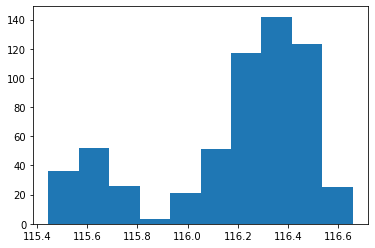

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df_final['Value','mean'])
plt.show()